<a href="https://colab.research.google.com/github/FilizEker/FilizEker/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

data=pd.read_csv ('/content/sample_data/Diabetes Classification.csv')
data.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [ ]:
data.info

<bound method DataFrame.info of      Age  Gender  BMI Blood Pressure  FBS  HbA1c Family History of Diabetes  \
0     45    Male   25         Normal  100    5.7                         No   
1     55  Female   30           High  120    6.4                        Yes   
2     65    Male   35           High  140    7.1                        Yes   
3     75  Female   40           High  160    7.8                        Yes   
4     40    Male   20         Normal   80    5.0                         No   
..   ...     ...  ...            ...  ...    ...                        ...   
123   17  Female   15         Normal  100    5.7                         No   
124   22    Male   19         Normal  120    6.4                         No   
125   27  Female   24           High  140    7.1                         No   
126   32    Male   29           High  160    7.8                         No   
127   37  Female   34           High  180    8.5                         No   

    Smoking     Diet Exercise Diagnosis  
0        No  Healthy  Regular        No  
1       Yes     Poor       No       Yes  
2       Yes     Poor       No       Yes  
3       Yes     Poor       No       Yes  
4        No  Healthy  Regular        No  
..      ...      ...      ...       ...  
123     Yes     Poor       No       Yes  
124     Yes     Poor       No       Yes  
125     Yes     Poor       No       Yes  
126     Yes     Poor       No       Yes  
127     Yes     Poor       No       Yes  

[128 rows x 11 columns]>

In [ ]:
data.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Blood Pressure,0
FBS,0
HbA1c,0
Family History of Diabetes,0
Smoking,0
Diet,0
Exercise,0


In [ ]:
data.shape

(128, 11)

In [ ]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Blood Pressure', 'FBS', 'HbA1c',
       'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise',
       'Diagnosis'],
      dtype='object')

In [ ]:
x=data.drop('Diagnosis', axis=1)
y=data['Diagnosis']
print(x.shape)
print(y.shape)


(128, 10)
(128,)


In [ ]:
from sklearn .neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

x = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)x

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



0.7307692307692307
[[19  1]
 [ 6  0]]
              precision    recall  f1-score   support

          No       0.76      0.95      0.84        20
         Yes       0.00      0.00      0.00         6

    accuracy                           0.73        26
   macro avg       0.38      0.47      0.42        26
weighted avg       0.58      0.73      0.65        26



In [ ]:
accuracy_values=[]
k_values=[]
for k in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  accuracy_values.append(accuracy)
  k_values.append(k)
  print(accuracy)
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.2692307692307692
[[ 7 13]
 [ 6  0]]
              precision    recall  f1-score   support

          No       0.54      0.35      0.42        20
         Yes       0.00      0.00      0.00         6

    accuracy                           0.27        26
   macro avg       0.27      0.17      0.21        26
weighted avg       0.41      0.27      0.33        26

0.7307692307692307
[[19  1]
 [ 6  0]]
              precision    recall  f1-score   support

          No       0.76      0.95      0.84        20
         Yes       0.00      0.00      0.00         6

    accuracy                           0.73        26
   macro avg       0.38      0.47      0.42        26
weighted avg       0.58      0.73      0.65        26

0.5384615384615384
[[14  6]
 [ 6  0]]
              precision    recall  f1-score   support

          No       0.70      0.70      0.70        20
         Yes       0.00      0.00      0.00         6

    accuracy                           0.54        26
   macro avg  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

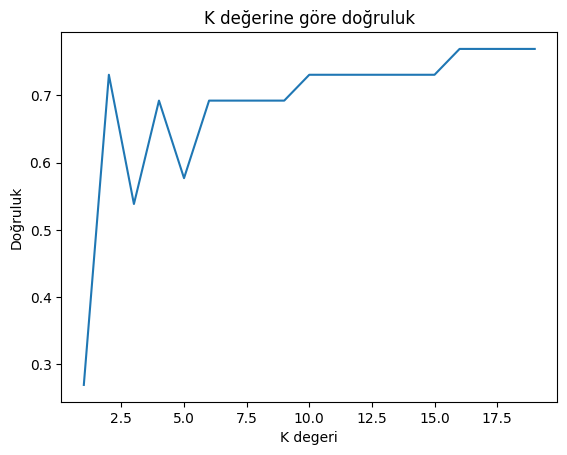

In [ ]:
plt.figure()
plt.plot(k_values,accuracy_values, linestyle="-")
plt.xlabel('K degeri')
plt.ylabel('Doğruluk')
plt.title('K değerine göre doğruluk')
plt.show()

# Yeni Bölüm

# Yeni Bölüm